<a href="https://colab.research.google.com/github/nafl13/ICT_Internship/blob/project/ICT_Project_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/cardio_train.csv')

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,male,168,62.0,110,80,normal,normal,no,no,active,0
1,1,20228,female,156,85.0,140,90,well above normal,normal,no,no,active,1
2,2,18857,female,165,64.0,130,70,well above normal,normal,no,no,not active,1
3,3,17623,male,169,82.0,150,100,normal,normal,no,no,active,1
4,4,17474,female,156,56.0,100,60,normal,normal,no,no,not active,0


In [ ]:
data.shape

(70000, 13)

In [ ]:
#converting the age in days to age in yrs
data['age'] = data['age']/365

In [ ]:
data.describe()

,id,age,height,weight,ap_hi,ap_lo,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,164.359229,74.205690,128.817286,96.630414,0.499700
std,28851.302323,6.759594,8.210126,14.395757,154.011419,188.472530,0.500003
min,0.000000,29.583562,55.000000,10.000000,-150.000000,-70.000000,0.000000
25%,25006.750000,48.394521,159.000000,65.000000,120.000000,80.000000,0.000000
50%,50001.500000,53.980822,165.000000,72.000000,120.000000,80.000000,0.000000
75%,74889.250000,58.430137,170.000000,82.000000,140.000000,90.000000,1.000000
max,99999.000000,64.967123,250.000000,200.000000,16020.000000,11000.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 6.9+ MB


In [ ]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
data.dtypes

id               int64
age            float64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio           int64
dtype: object

In [ ]:
#convert age values into int
data['age'] = data['age'].astype(int)

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,male,168,62.0,110,80,normal,normal,no,no,active,0
1,1,55,female,156,85.0,140,90,well above normal,normal,no,no,active,1
2,2,51,female,165,64.0,130,70,well above normal,normal,no,no,not active,1
3,3,48,male,169,82.0,150,100,normal,normal,no,no,active,1
4,4,47,female,156,56.0,100,60,normal,normal,no,no,not active,0


In [ ]:
data.age.nunique()

28

In [ ]:
data.height.nunique()

109

In [ ]:
data.weight.nunique()

287

In [ ]:
data.id.nunique()

70000

In [ ]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
gender = np.array(data['gender'].unique())

In [ ]:
gender

array(['male', 'female'], dtype=object)

In [ ]:
# counts number of male in gender column
object_value_count = data['gender'].value_counts()['male']
object_value_count

24470

In [ ]:
# counts number of female
object_value_count2 = data['gender'].value_counts()['female']
object_value_count2

45530

**PIE_CHART**

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# converted the values into percentage of 360 by dividing the number with total number of rows
cardio = [(object_value_count/data.id.nunique())*360,(object_value_count2/data.id.nunique())*360]

In [ ]:
cardio

[125.8457142857143, 234.15428571428572]

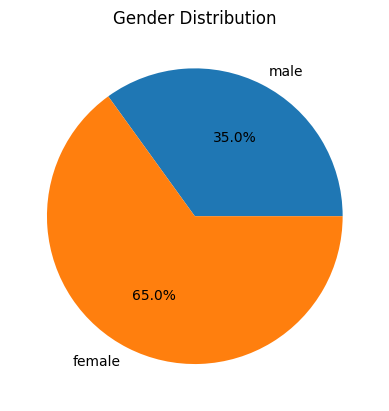

In [ ]:
# pie chart of percentage of males and females in gender column
plt.pie(cardio, labels=gender, autopct="%1.1f%%")
plt.title('Gender Distribution')
plt.show()

In [ ]:
# number of males with cardio disease
num_males_with_c = len(data[(data['gender'] == 'male') & (data['cardio'] == 1)])
num_males_with_c

12363

In [ ]:
# number of females with cardio disease
num_females_with_c = len(data[(data['gender'] == 'female') & (data['cardio'] == 1)])
num_females_with_c

22616

In [ ]:
#extracting the count of both males and females who suffer from cardio disease as well as those who doesnot has the cardio disease
cardio_p=[len(data[(data['gender'] == 'male') & (data['cardio'] == 1)]),len(data[(data['gender'] == 'female') & (data['cardio'] == 1)])]
cardio_n=[len(data[(data['gender'] == 'male') & (data['cardio'] == 0)]),len(data[(data['gender'] == 'female') & (data['cardio'] == 0)])]

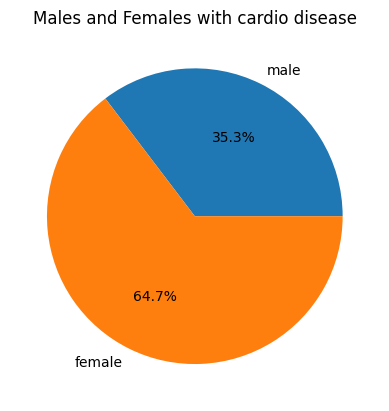

In [ ]:
#plotting the piechart for the data of the males and females who suffer from cardio disease
plt.pie(cardio_p ,labels=gender, autopct='%1.1f%%')
plt.title('Males and Females with cardio disease')
plt.show()

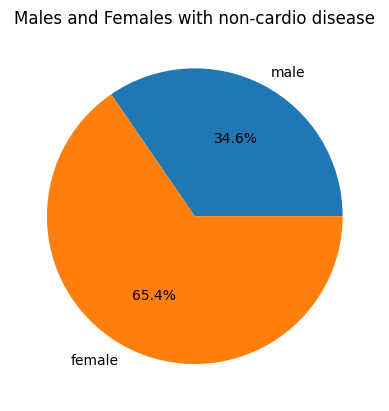

In [ ]:
#plotting the piechart for the data of males and females who doesnot suffer from  cardio disease
plt.pie(cardio_n ,labels=gender, autopct='%1.1f%%')
plt.title('Males and Females with non-cardio disease')
plt.show()

In [ ]:
#extracting the count of males and females those who smokes
male_count2 = df[(df['gender'] == 'male') & (df['smoke'] == 'yes')] 
female_count2 = df[(df['gender'] == 'female') & (df['smoke'] == 'yes')]

In [ ]:
male_count2.nunique()

id             5356
age              26
gender            1
height           54
weight          129
ap_hi            71
ap_lo            62
cholesterol       3
gluc              3
smoke             1
alco              2
active            2
cardio            2
dtype: int64

In [ ]:
female_count2.nunique()

id             813
age             26
gender           1
height          41
weight          95
ap_hi           33
ap_lo           27
cholesterol      3
gluc             3
smoke            1
alco             2
active           2
cardio           2
dtype: int64

In [ ]:
#extracting the count of males and females who donot smokes
male_count2 = df[(df['gender'] == 'male') & (df['smoke'] == 'no')]
female_count2 = df[(df['gender'] == 'female') & (df['smoke'] == 'no')]

In [ ]:
male_count2.nunique()

id             19114
age               27
gender             1
height            79
weight           156
ap_hi            108
ap_lo             95
cholesterol        3
gluc               3
smoke              1
alco               2
active             2
cardio             2
dtype: int64

In [ ]:
female_count2.nunique()

id             44717
age               28
gender             1
height            98
weight           240
ap_hi            141
ap_lo            136
cholesterol        3
gluc               3
smoke              1
alco               2
active             2
cardio             2
dtype: int64

In [ ]:
smo=[len(data[(data['gender'] == 'male') & (data['smoke'] == 'yes')]),len(data[(data['gender'] == 'female') & (data['smoke'] == 'yes')])]
smok=[len(data[(data['gender'] == 'male') & (data['smoke'] == 'no')]),len(data[(data['gender'] == 'female') & (data['smoke'] == 'no')])]

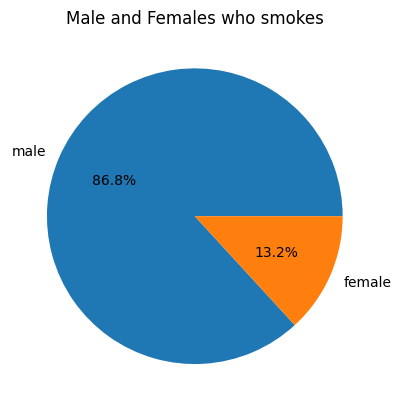

In [ ]:
#plotting pie with the collected data
plt.pie(smo,labels=gender, autopct='%1.1f%%')
plt.title('Male and Females who smokes')
plt.show()

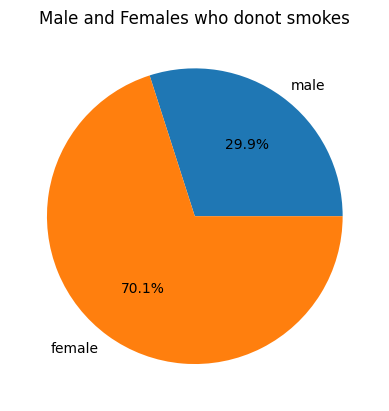

In [ ]:
plt.pie(smok ,labels=gender, autopct='%1.1f%%')
plt.title('Male and Females who donot smokes')
plt.show()

In [ ]:
#extracting the count of the people who smokes and doesnot smokes has the cardio as well as non_cardio disease
smoke_yn=[len(data[(data['smoke'] == 'yes') & (data['cardio'] == 1)]),len(data[(data['smoke'] == 'no') & (data['cardio'] == 1)])]
smoke_ny=[len(data[(data['smoke'] == 'yes') & (data['cardio'] == 0)]),len(data[(data['smoke'] == 'no') & (data['cardio'] == 0)])]
smoke= ['smokes','non-smokes']

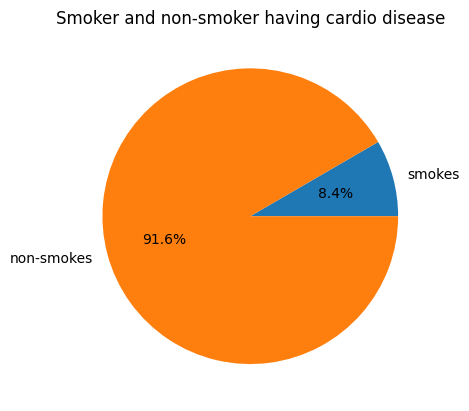

In [ ]:
#plotted the pie for the data
plt.pie(smoke_yn ,labels=smoke, autopct='%1.1f%%')
plt.title('Smoker and non-smoker having cardio disease')
plt.show()

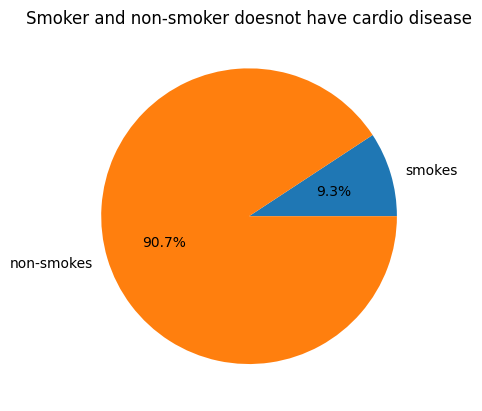

In [ ]:
plt.pie(smoke_ny ,labels=smoke, autopct='%1.1f%%')
plt.title('Smoker and non-smoker doesnot have cardio disease')
plt.show()

In [ ]:
#extracting the count of active and non-active people who has cardio as well as non-cardio disease
act=['active','non-active']
active_p=[len(data[(data['active'] == 'active') & (data['cardio'] == 1)]),len(data[(data['active'] == 'not active') & (data['cardio'] == 1)])]
active_n=[len(data[(data['active'] == 'active') & (data['cardio'] == 0)]),len(data[(data['active'] == 'not active') & (data['cardio'] == 0)])]


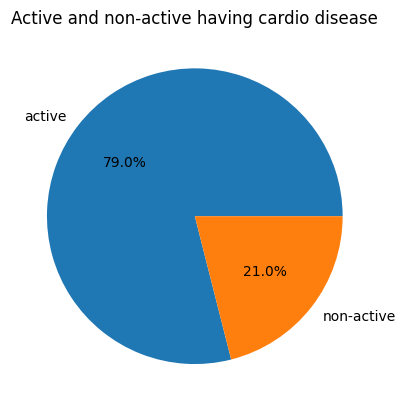

In [ ]:
#plotting the pie for the collected data
plt.pie(active_p ,labels=act, autopct='%1.1f%%')
plt.title('Active and non-active having cardio disease')
plt.show()

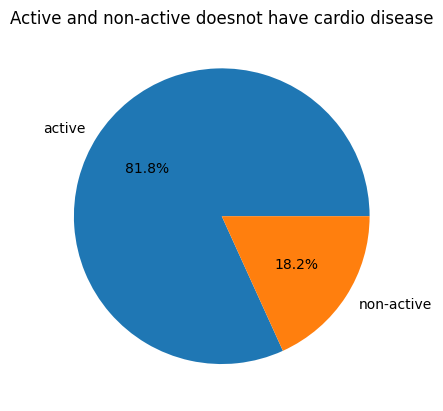

In [ ]:
plt.pie(active_n ,labels=act, autopct='%1.1f%%')
plt.title('Active and non-active doesnot have cardio disease')
plt.show()

**SCATTER_PLOT**

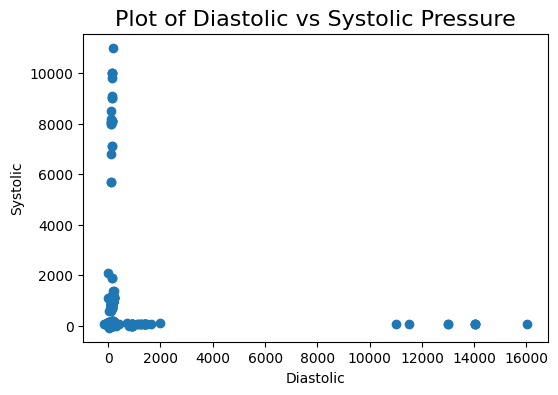

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['ap_hi'],data['ap_lo'])
plt.title('Plot of Diastolic vs Systolic Pressure',fontsize=16)
plt.xlabel('Diastolic')
plt.ylabel('Systolic')
plt.show()

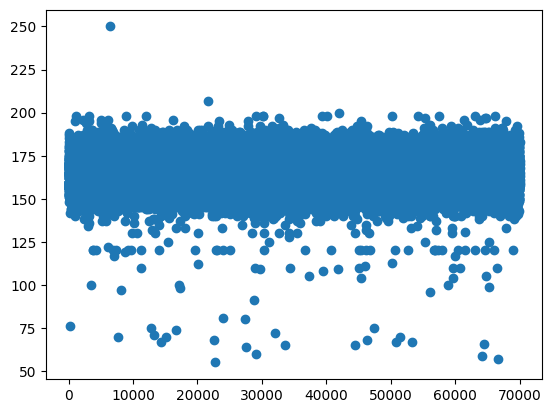

In [ ]:
plt.scatter(data.index,y=data['height'])

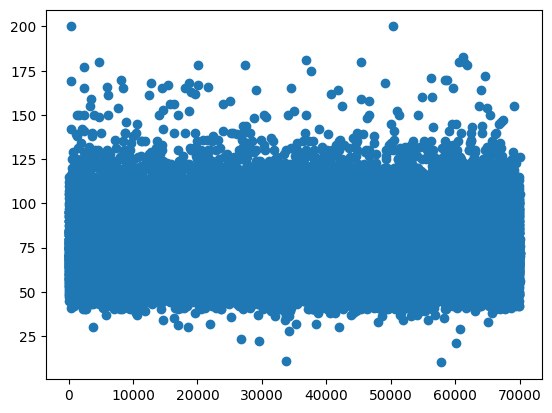

In [ ]:
plt.scatter(data.index,y=data['weight'])

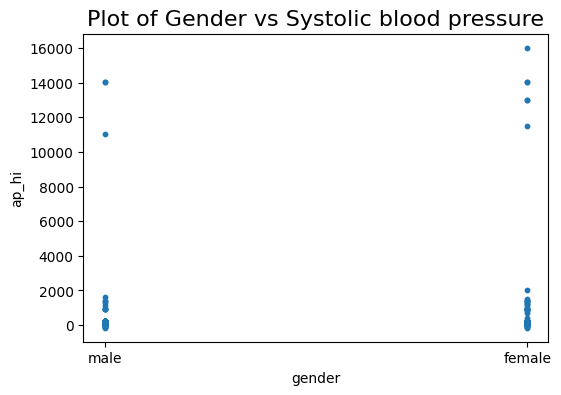

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['gender'],data['ap_hi'],s=10)
plt.title('Plot of Gender vs Systolic blood pressure',fontsize=16)
plt.xlabel('gender')
plt.ylabel('ap_hi')
plt.show()

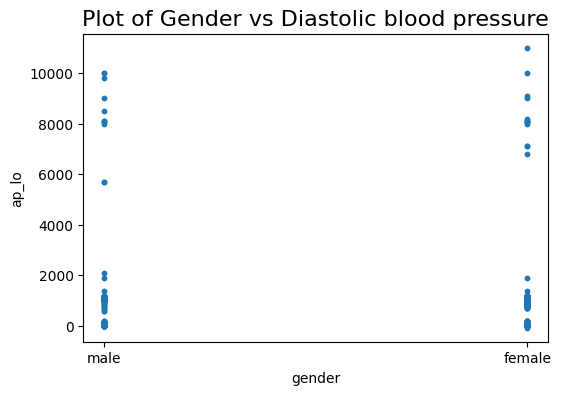

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['gender'],data['ap_lo'],s=10)
plt.title('Plot of Gender vs Diastolic blood pressure',fontsize=16)
plt.xlabel('gender')
plt.ylabel('ap_lo')
plt.show()

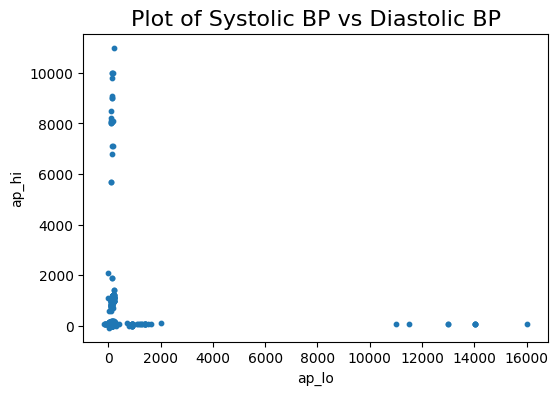

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['ap_hi'],data['ap_lo'],s=10)
plt.title('Plot of Systolic BP vs Diastolic BP',fontsize=16)
plt.xlabel('ap_lo')
plt.ylabel('ap_hi')
plt.show()

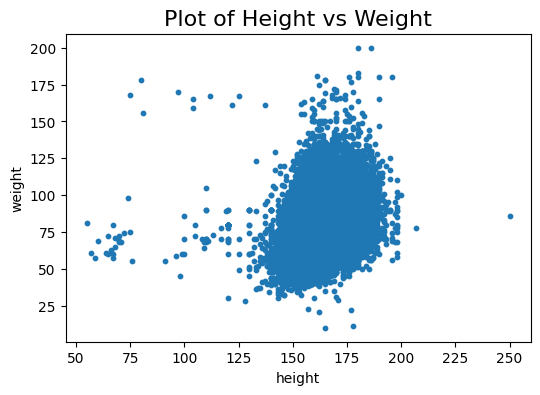

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['height'],data['weight'],s=10)
plt.title('Plot of Height vs Weight',fontsize=16)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

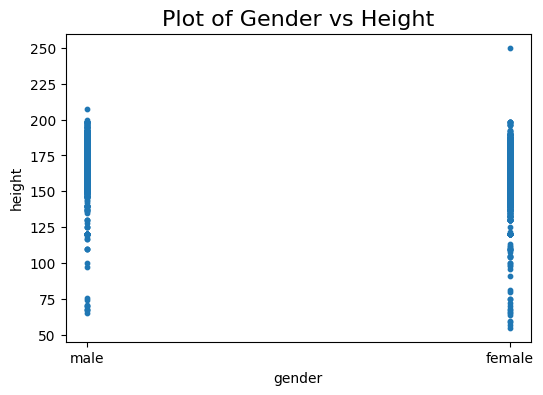

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['gender'],data['height'],s=10)
plt.title('Plot of Gender vs Height',fontsize=16)
plt.xlabel('gender')
plt.ylabel('height')
plt.show()

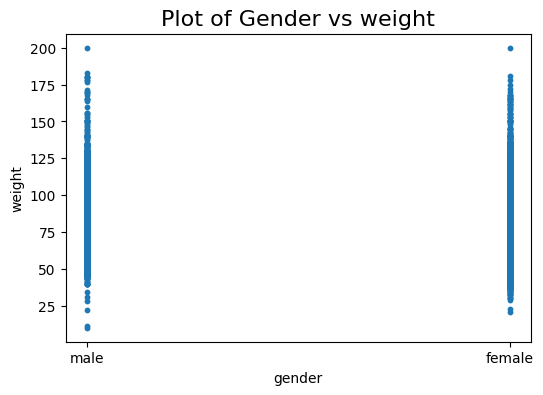

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['gender'],data['weight'],s=10)
plt.title('Plot of Gender vs weight',fontsize=16)
plt.xlabel('gender')
plt.ylabel('weight')
plt.show()

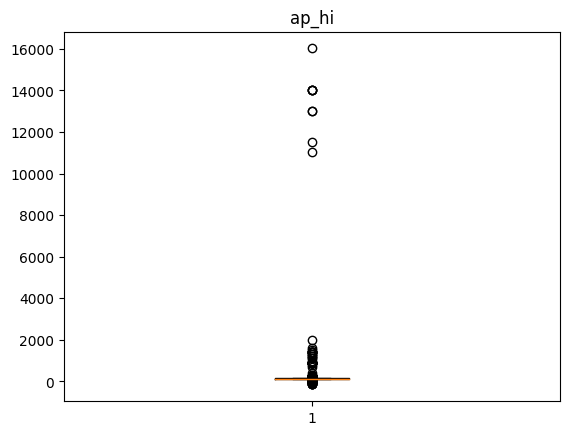

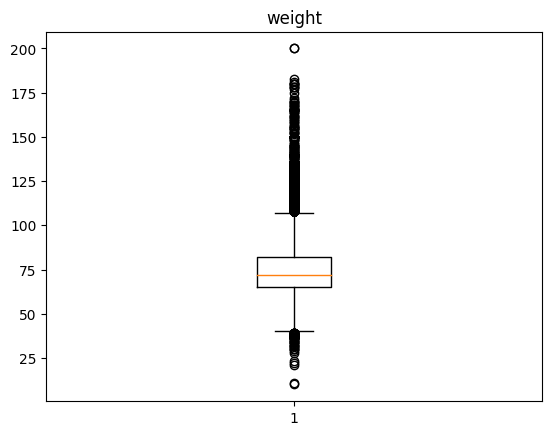

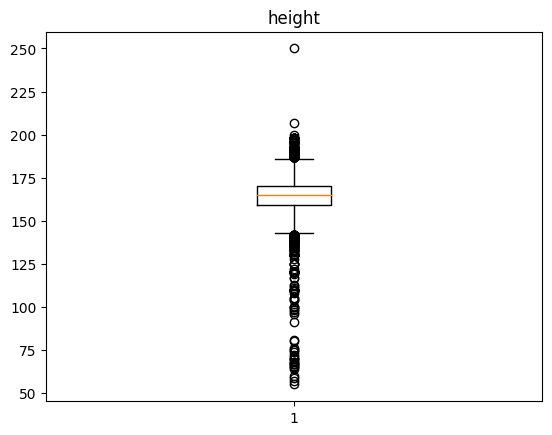

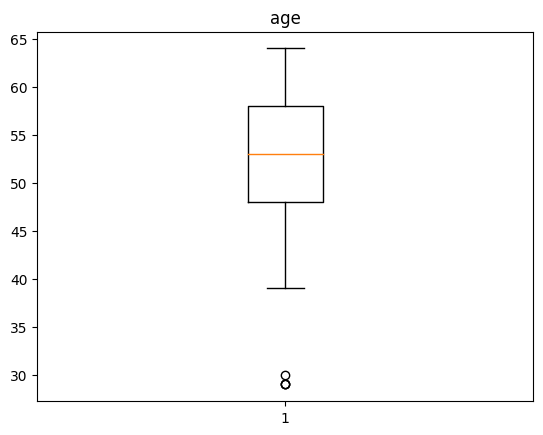

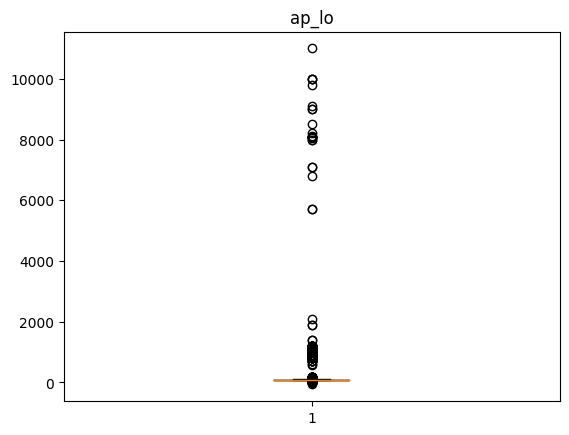

In [ ]:
for i in [ 'ap_hi', 'weight','height','age','ap_lo']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the gender column
label_encoder.fit(data['gender'])

# Transform the gender column with label encoding
data['gender'] = label_encoder.transform(data['gender'])
label_encoder.fit(data['cholesterol'])

# Transform the gender column with label encoding
data['cholesterol'] = label_encoder.transform(data['cholesterol'])

label_encoder.fit(data['gluc'])

# Transform the gender column with label encoding
data['gluc'] = label_encoder.transform(data['gluc'])

label_encoder.fit(data['active'])

# Transform the gender column with label encoding
data['active'] = label_encoder.transform(data['active'])

label_encoder.fit(data['smoke'])

# Transform the gender column with label encoding
data['smoke'] = label_encoder.transform(data['smoke'])

label_encoder.fit(data['alco'])

# Transform the gender column with label encoding
data['alco'] = label_encoder.transform(data['alco'])

<ipython-input-57-d40a887bb390>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['age'],25,interpolation ='midpoint')
<ipython-input-57-d40a887bb390>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['age'],50,interpolation ='midpoint')
<ipython-input-57-d40a887bb390>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(d

Q1 =  48.0
Q2 =  53.0
Q3 =  58.0
IQR =  10.0
low_lim =  33.0
up_lim =  73.0
Outliers =  [29 29 29 30]


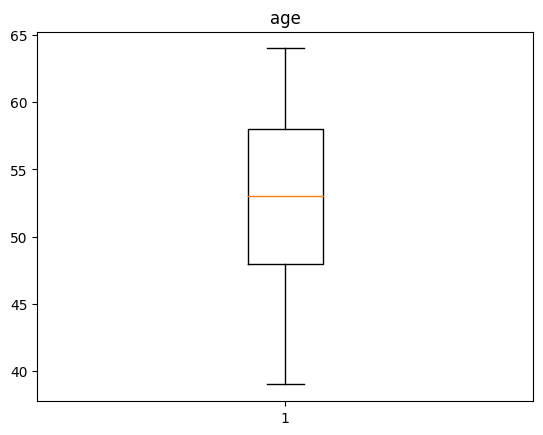

In [ ]:
Q1 = np.percentile(data['age'],25,interpolation ='midpoint')
Q2 = np.percentile(data['age'],50,interpolation ='midpoint')
Q3 = np.percentile(data['age'],75,interpolation ='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_lim = ',low_lim)
print('up_lim = ',up_lim)

outlier=[]
for x in data['age']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)
print('Outliers = ',np.array(outlier))

data = data[(data['age'] >= low_lim) & (data['age'] <= up_lim)]

for i in ['age']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

<ipython-input-58-7cb18756c575>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['weight'],25,interpolation ='midpoint')
<ipython-input-58-7cb18756c575>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['weight'],50,interpolation ='midpoint')
<ipython-input-58-7cb18756c575>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percen

Q1 =  65.0
Q2 =  72.0
Q3 =  82.0
IQR =  17.0
low_lim =  39.5
up_lim =  107.5
Outliers =  [112. 115. 110. ... 113. 110. 126.]


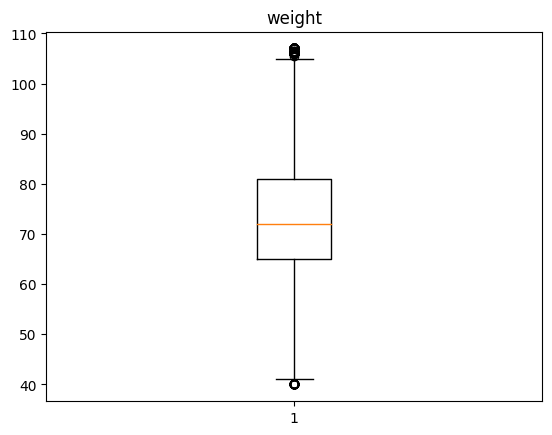

In [ ]:
Q1 = np.percentile(data['weight'],25,interpolation ='midpoint')
Q2 = np.percentile(data['weight'],50,interpolation ='midpoint')
Q3 = np.percentile(data['weight'],75,interpolation ='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_lim = ',low_lim)
print('up_lim = ',up_lim)

outlier=[]
for x in data['weight']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)
print('Outliers = ',np.array(outlier))

data = data[(data['weight'] >= low_lim) & (data['weight'] <= up_lim)]

for i in ['weight']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

<ipython-input-59-d36c68d86167>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['height'],25,interpolation ='midpoint')
<ipython-input-59-d36c68d86167>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['height'],50,interpolation ='midpoint')
<ipython-input-59-d36c68d86167>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percen

Q1 =  159.0
Q2 =  165.0
Q3 =  170.0
IQR =  11.0
low_lim =  142.5
up_lim =  186.5
Outliers =  [188  76 142 141 140 198 187 196 187 138 187 142 194 190 134 140 136 198
 187 100 190 190 120 187 120 189 189 187 194 189 196 137 190 140 187 189
 188 187 137 192 187 196 141 250 187 190 120 189 142 140 117 120  70 190
 119 137 198 142 120 120 130 192 136 140 130 190 187 120 110 193 187 190
 198 187 187 191 188 187 132 138 188 138  71 190 130 188 138 120 135 140
  67 142 189 189 188 142  70 187 190 139 187 189 141 196 133  74 190 189
 100  98 137 187 190 189 192 187 141 140 133 190 188 142 141 187 120 190
 130 141 189 187 207 192 140 141 189 140  68 188 188  55 141 120 140 190
 120 192 188 188 142 188 187 133 189 120 142 187 187 193 120 141 188 190
 141 140 189 189 188 141 135 140 187  64 187 192 195 187 142 130  91 139
 140 110 136 187 187 198  60 189 187 140 109 140 192 140 198 198 130 187
 120 140 136 190 188 188 140 142 125 188 192 138 187 190 189 139  72 140
 187 187 197 130 191 189 142 19

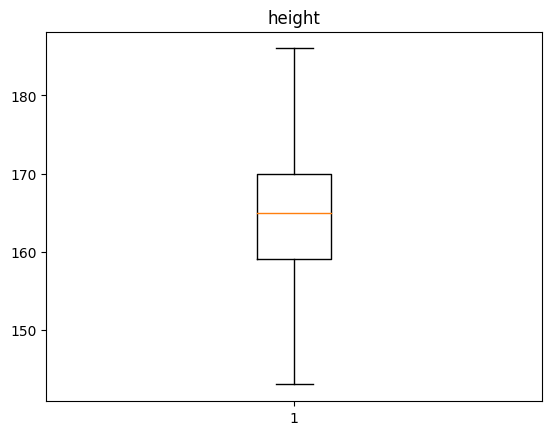

In [ ]:
Q1 = np.percentile(data['height'],25,interpolation ='midpoint')
Q2 = np.percentile(data['height'],50,interpolation ='midpoint')
Q3 = np.percentile(data['height'],75,interpolation ='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_lim = ',low_lim)
print('up_lim = ',up_lim)

outlier=[]
for x in data['height']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)
print('Outliers = ',np.array(outlier))

data = data[(data['height'] >= low_lim) & (data['height'] <= up_lim)]

for i in ['height']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)#  columns for the heatmap
heatmap_cols = ['age','gender','height', 'weight', 'ap_lo', 'ap_hi','cholesterol','gluc','smoke','alco','active','cardio']
heatmap_data = data[heatmap_cols]



<ipython-input-60-91d399a4f6c7>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['ap_hi'],25,interpolation ='midpoint')
<ipython-input-60-91d399a4f6c7>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['ap_hi'],50,interpolation ='midpoint')
<ipython-input-60-91d399a4f6c7>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percenti

Q1 =  120.0
Q2 =  120.0
Q3 =  140.0
IQR =  20.0
low_lim =  90.0
up_lim =  170.0
Outliers =  [180 180 190 ... 180 200 180]


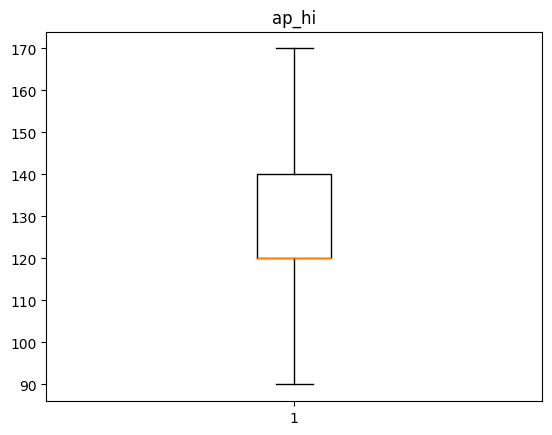

In [ ]:
Q1 = np.percentile(data['ap_hi'],25,interpolation ='midpoint')
Q2 = np.percentile(data['ap_hi'],50,interpolation ='midpoint')
Q3 = np.percentile(data['ap_hi'],75,interpolation ='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_lim = ',low_lim)
print('up_lim = ',up_lim)

outlier=[]
for x in data['ap_hi']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)
print('Outliers = ',np.array(outlier))

data = data[(data['ap_hi'] >= low_lim) & (data['ap_hi'] <= up_lim)]

for i in ['ap_hi']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

<ipython-input-61-e08db87dfc90>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['ap_lo'],25,interpolation ='midpoint')
<ipython-input-61-e08db87dfc90>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['ap_lo'],50,interpolation ='midpoint')
<ipython-input-61-e08db87dfc90>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percenti

Q1 =  80.0
Q2 =  80.0
Q3 =  90.0
IQR =  10.0
low_lim =  65.0
up_lim =  105.0
Outliers =  [  60   60   60 ...   60 1000   60]


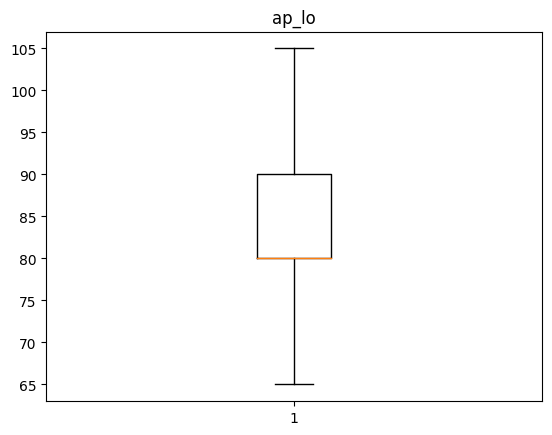

In [ ]:
Q1 = np.percentile(data['ap_lo'],25,interpolation ='midpoint')
Q2 = np.percentile(data['ap_lo'],50,interpolation ='midpoint')
Q3 = np.percentile(data['ap_lo'],75,interpolation ='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_lim = ',low_lim)
print('up_lim = ',up_lim)

outlier=[]
for x in data['ap_lo']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)
print('Outliers = ',np.array(outlier))

data = data[(data['ap_lo'] >= low_lim) & (data['ap_lo'] <= up_lim)]

for i in ['ap_lo']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

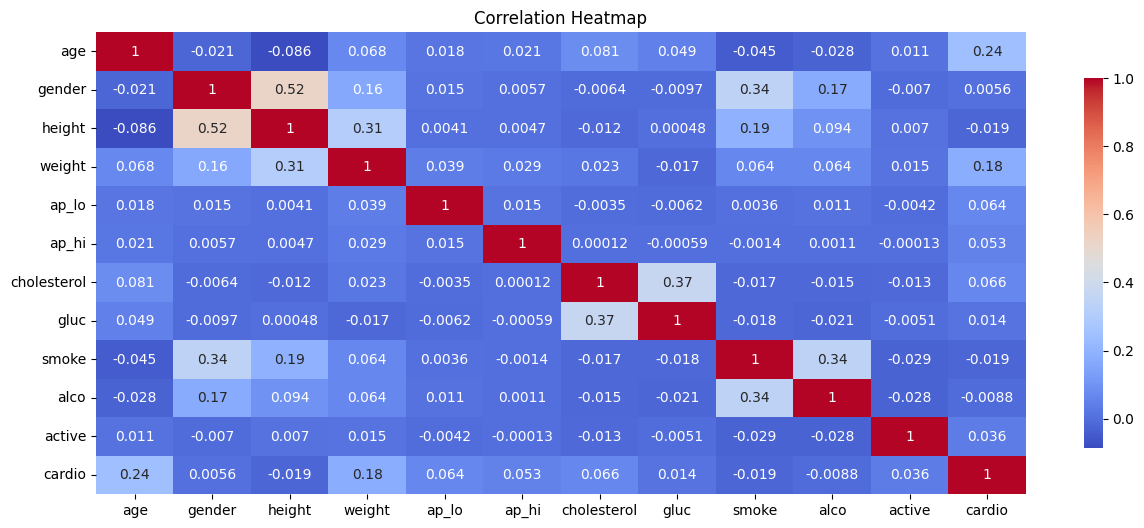

In [ ]:
# Create heatmap using seaborn
plt.figure(figsize=(15, 6)) 
sns.heatmap(heatmap_data.corr(), cmap='coolwarm', annot=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.shape

(62502, 13)

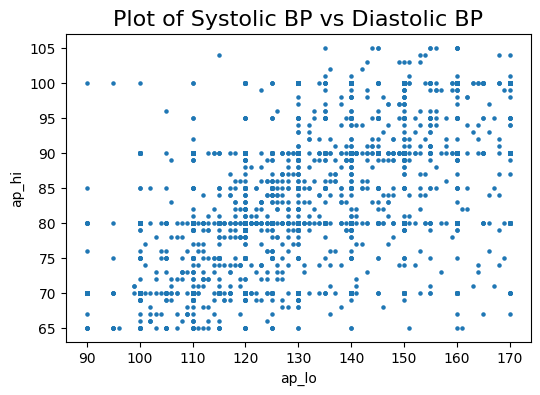

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['ap_hi'],data['ap_lo'],s=5)
plt.title('Plot of Systolic BP vs Diastolic BP',fontsize=16)
plt.xlabel('ap_lo')
plt.ylabel('ap_hi')
plt.show()

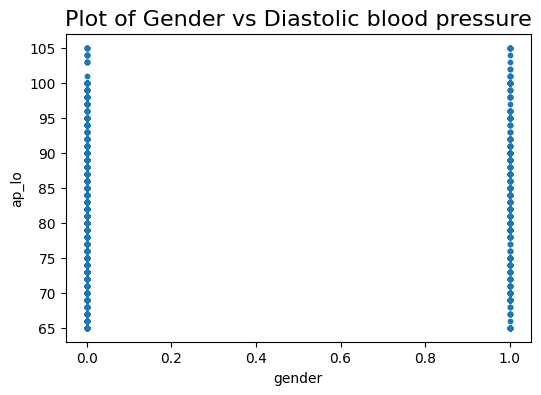

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['gender'],data['ap_lo'],s=10)
plt.title('Plot of Gender vs Diastolic blood pressure',fontsize=16)
plt.xlabel('gender')
plt.ylabel('ap_lo')
plt.show()

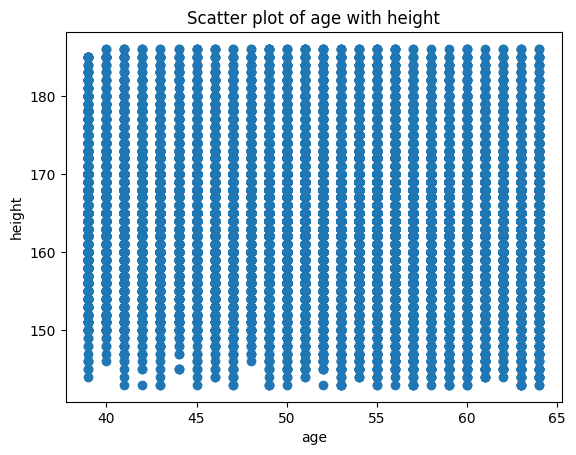

In [ ]:
plt.scatter(data.age,y=data['height'])
plt.title('Scatter plot of age with height')
plt.xlabel('age')
plt.ylabel('height')
plt.show()

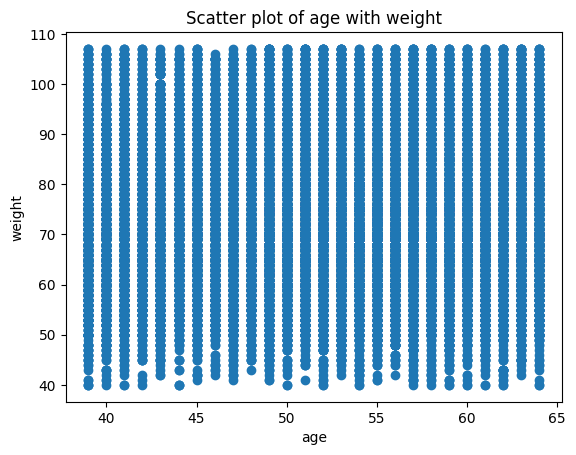

In [ ]:
plt.scatter(data.age,y=data['weight'])
plt.title('Scatter plot of age with weight')
plt.xlabel('age')
plt.ylabel('weight')
plt.show()

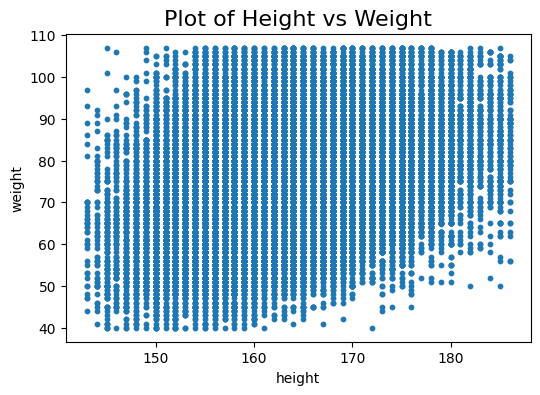

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['height'],data['weight'],s=10)
plt.title('Plot of Height vs Weight',fontsize=16)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

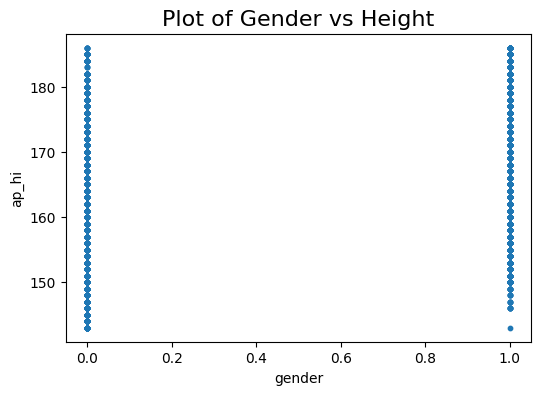

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data['gender'],data['height'],s=10)
plt.title('Plot of Gender vs Height',fontsize=16)
plt.xlabel('gender')
plt.ylabel('ap_hi')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the features
scaled_data = scaler.fit_transform(data)

data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,1,168,62.0,110,80,1,1,0,0,0,0
1,1,55,0,156,85.0,140,90,2,1,0,0,0,1
2,2,51,0,165,64.0,130,70,2,1,0,0,1,1
3,3,48,1,169,82.0,150,100,1,1,0,0,0,1
5,8,60,0,151,67.0,120,80,0,0,0,0,1,0
6,9,60,0,157,93.0,130,80,2,1,0,0,0,0
7,12,61,1,178,95.0,130,90,2,2,0,0,0,1
8,13,48,0,158,71.0,110,70,1,1,0,0,0,0
10,15,61,0,169,80.0,120,80,1,1,0,0,0,0
11,16,51,1,173,60.0,120,80,1,1,0,0,0,0


**linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,f1_score, precision_score


In [ ]:
X=data.drop('cardio',axis=1)
y=data['cardio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
threshold = 0.5
y_pred_binary = [1 if val >= threshold else 0 for val in y_pred]


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 #Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)


In [ ]:
print('Mean squared error is: ',mse)
print('R Squared value is: ',r2)
print("F1 Score:", f1)
print("Precision:", precision)

Mean squared error is:  0.19222059765266963
R Squared value is:  0.2309418197423453
F1 Score: 0.702942712867839
Precision: 0.7574108818011257


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score,f1_score, precision_score
dt_clf=DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)


In [ ]:
print('Mean squared error is: ',mse)
print('R Squared value is: ',r2)

print("F1 Score:", f1)
print("Precision:", precision)

Mean squared error is:  0.3785297176225902
R Squared value is:  -0.5144650436177125
F1 Score: 0.6195529827946614
Precision: 0.6133397007322509


In [ ]:
print('Accuracy is: ',accuracy)
print('Confusion matrix : ',confusion_matrix(y_test,y_pred))

Accuracy is:  0.6214702823774098
Confusion matrix :  [[3916 2429]
 [2303 3853]]


**Random Forest model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
model_2 = rf_clf.fit(X_train,y_train)
prediction_2 = model_2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error is:',mean_squared_error(y_test,prediction_2))
print('R squared value is:',r2_score(y_test,prediction_2))

Mean squared error is: 0.2797376209903208
R squared value is: -0.11920630970649637


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,prediction_2))
print(confusion_matrix(y_test,prediction_2))

Accuracy is: 0.7202623790096793
[[4728 1617]
 [1880 4276]]


**Logistic regression model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logic_m=LogisticRegression()
model_4 = logic_m.fit(X_train,y_train)
prediction_4 = model_4.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is : ",accuracy_score(y_test,prediction_4))

Accuracy is :  0.7039436845052396


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
#Define a range of k values to test
#k_value = range(1, 100)  # Test k values from 1 to 100                  

# Create an empty list to store the cross-validation scores
#cv_s = []

#for k in k_value:
    #knn = KNeighborsClassifier(n_neighbors=k)
    #scores = cross_val_score(knn, X_train, y_train, cv=5)  
    #cv_s.append(np.mean(scores))

In [ ]:
# Print the validation scores for each k value
#for k, score in zip(k_value, cv_s):
    #print("K =", k, "  Validation Score =", score)

In [ ]:
k = 9  # Set the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Confusion matrix : ',confusion_matrix(y_test,y_pred))

Accuracy: 0.6405087592992561
Confusion matrix :  [[4552 1793]
 [2701 3455]]


**Hyper parameter tuning**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 4, 6 ,8],  # Minimum number of samples required to split an internal node
}


dt = DecisionTreeClassifier()



# Perform random search cross-validation
random_search = RandomizedSearchCV(dt, param_grid, cv=5, n_iter=10)
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Random Search Best Hyperparameters: ", random_search.best_params_)
print("Random Search Best Score: ", random_search.best_score_)



Random Search Best Hyperparameters:  {'min_samples_split': 6, 'max_depth': 5}
Random Search Best Score:  0.7233255734426558


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 4, 6 ,8]  
}


dt = DecisionTreeClassifier()


# Perform grid search cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Grid Search Best Hyperparameters: ", grid_search.best_params_)
print("Grid Search Best Score: ", grid_search.best_score_)



Grid Search Best Hyperparameters:  {'max_depth': 5, 'min_samples_split': 4}
Grid Search Best Score:  0.7233255734426558


In [ ]:
import pickle
# Make pickle file of our model
pickle.dump(gb_classifier, open("model.pkl", "wb"))